

```
# This is formatted as code
```

Linear Regression on Measles Outbreak Prediction

**Use Case:** Predict measles outbreak cases based on demographic and immunization data across Rwanda, Senegal, and Congo.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

## ✅ Load Unified Dataset

In [3]:
combined_df = pd.read_csv('/content/Unified_Health_Dataset.csv')  # Replace with actual path if saving separately

## 📊 Correlation Heatmap & Feature Distributions

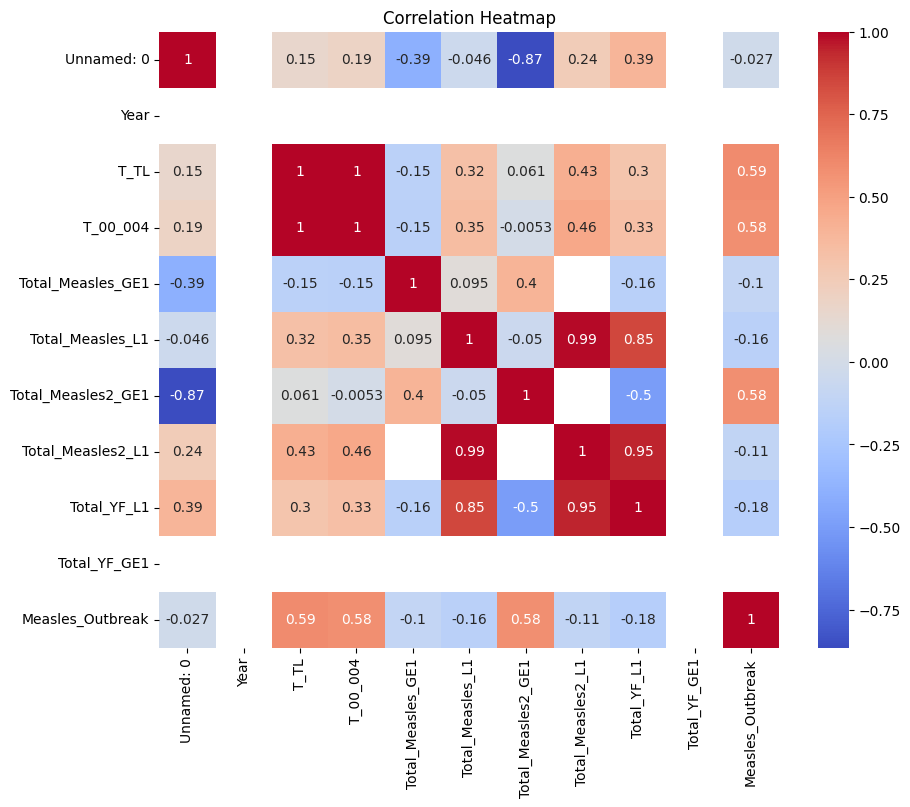

In [5]:
numeric_df = combined_df.drop(columns=["Country", "Province"])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

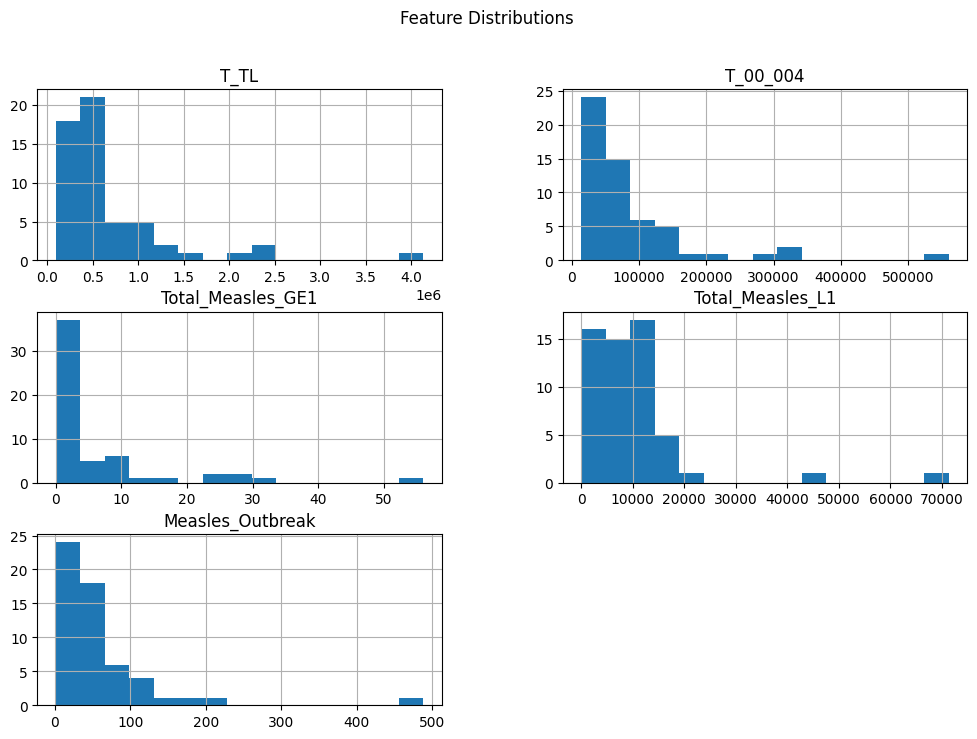

In [6]:
numeric_df[['T_TL', 'T_00_004', 'Total_Measles_GE1', 'Total_Measles_L1', 'Measles_Outbreak']].hist(bins=15, figsize=(12, 8))
plt.suptitle("Feature Distributions")
plt.show()

## 🔬 Feature Engineering + Preprocessing

In [7]:
data = combined_df.dropna()
features = ['T_TL', 'T_00_004', 'Total_Measles_GE1', 'Total_Measles_L1',
            'Total_Measles2_GE1', 'Total_Measles2_L1', 'Total_YF_L1', 'Total_YF_GE1']
X = data[features]
y = data['Measles_Outbreak']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## ⚙️ Linear Regression with Gradient Descent

In [8]:
lr_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
lr_model.fit(X_train_scaled, y_train)
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)
mse_train_lr = mean_squared_error(y_train, y_train_pred_lr)
mse_test_lr = mean_squared_error(y_test, y_test_pred_lr)
print("Train MSE:", mse_train_lr)
print("Test MSE:", mse_test_lr)

Train MSE: 10.870539512505244
Test MSE: 92.71107699773506


## 📉 Loss Curve Tracking

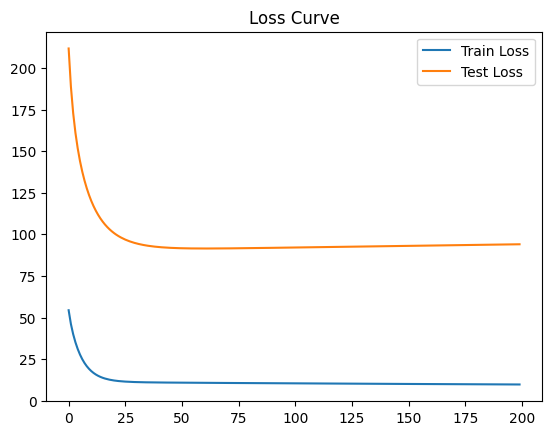

In [9]:
sgd_lr = SGDRegressor(max_iter=1, tol=None, learning_rate='constant', eta0=0.01, warm_start=True, random_state=42)
n_epochs = 200
train_losses, test_losses = [], []
for epoch in range(n_epochs):
    sgd_lr.fit(X_train_scaled, y_train)
    train_losses.append(mean_squared_error(y_train, sgd_lr.predict(X_train_scaled)))
    test_losses.append(mean_squared_error(y_test, sgd_lr.predict(X_test_scaled)))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

## 📈 Compare With Tree-Based Models

In [10]:
tree_model = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)
forest_model = RandomForestRegressor(random_state=42).fit(X_train, y_train)
mse_test_tree = mean_squared_error(y_test, tree_model.predict(X_test))
mse_test_forest = mean_squared_error(y_test, forest_model.predict(X_test))
print("Decision Tree MSE:", mse_test_tree)
print("Random Forest MSE:", mse_test_forest)

Decision Tree MSE: 100.66666666666667
Random Forest MSE: 95.24943333333333


## ✅ Save Best Model

In [11]:
best_model = lr_model
joblib.dump(best_model, "best_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

## 📊 Before and After Fit Visualization

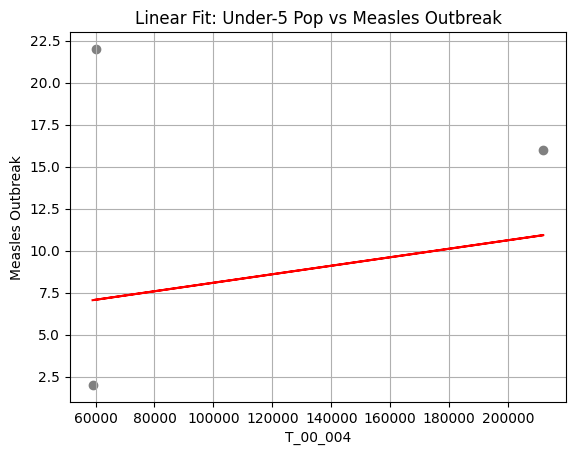

In [12]:
X_single = X[['T_00_004']]
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_single, y, test_size=0.2, random_state=42)
simple_lr = LinearRegression().fit(X_train_s, y_train_s)
y_pred_line = simple_lr.predict(X_test_s)
plt.scatter(X_test_s, y_test_s, color='gray')
plt.plot(X_test_s, y_pred_line, color='red')
plt.title("Linear Fit: Under-5 Pop vs Measles Outbreak")
plt.xlabel("T_00_004")
plt.ylabel("Measles Outbreak")
plt.grid(True)
plt.show()